In [30]:
labels = ['n0: Mantled howler (鬃毛吼猴)',
'n1: Patas monkey (赤猴)',
'n2: Bald uakari (白秃猴)',
'n3: Japanese macaque (日本獼猴)',
'n4: Pygmy marmoset (倭狨)',
'n5: White headed capuchin (捲尾猴)',
'n6: Silvery marmoset (銀狨)',
'n7: Common squirrel monkey (松鼠猴)',
'n8: Black headed night monkey (黑頭夜猴)',
'n9: Nilgiri langur (長尾葉猴)']

atlas = ['n008.jpg','n1113.jpg','n2157.jpg', 'n3060.jpg', 'n4058.jpg', 'n5053.jpg',
        'n6066.jpg','n7064.jpg', 'n8060.jpg', 'n9065.jpg']

In [31]:
import numpy as np
import tensorflow as tf
import keras
from keras import backend as K
from keras.models import load_model
%matplotlib inline
import matplotlib.pyplot as plt
import h5py
print(tf.__version__)
print(keras.__version__)

1.2.1
2.0.6


In [32]:
import cv2  # for image processing
from skimage.measure import block_reduce # install scikit-image
import scipy.io
## for warnings see discussion at https://github.com/ContinuumIO/anaconda-issues/issues/6678
import os
import tqdm
from sklearn.utils import shuffle

In [33]:
def image_center_crop(img):
    """
    Makes a square center crop of an img.
    """
    h,w,_ = img.shape
    N = min(h,w) # new h and w
    padh = (h - N) // 2
    padw = (w - N) // 2
    cropped_img = img[ padh: padh + N, padw: padw + N , :]
    return cropped_img
# wrap in one function
def img_prep(img, image_size = 250):
    center_img = image_center_crop(img)
    small_img = cv2.resize(center_img, (image_size, image_size))

    return small_img
def batch_norm(batch):
    # normalize
    post_img = []
    for img in batch:
        img = img.astype("float32") 
        post_img.append(keras.applications.inception_v3.preprocess_input(img))
    return post_img

## The model works with _.jpg, .jpeg_ and _.png_

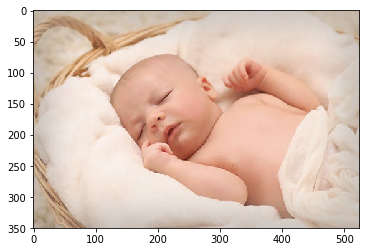

In [27]:
# img = cv2.imread('data/examples/baby3.jpg')
# img = cv2.imread('data/examples/baby2.png')
img = cv2.imread('data/examples/baby1.jpeg')
img.shape
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [36]:
mymodel = load_model('monkey.h5')# trained and saved in notebook **monkey_aws**
# the model is too big for github

Input image:


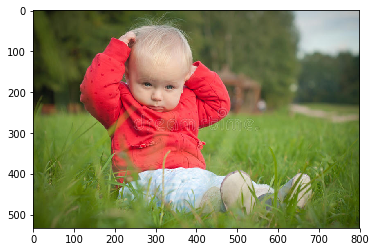

Predicted monkey species: n2: Bald uakari (白秃猴)


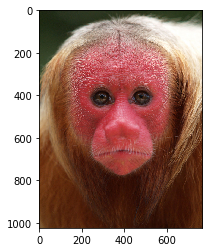

In [41]:
inputX = cv2.imread('data/examples/baby3.jpg')
# inputX = cv2.imread('data/examples/baby1.jpeg')
# inputX = cv2.imread('data/examples/n6014.jpg')
# inputX = cv2.imread('data/examples/n416.jpg')
# inputX = cv2.imread('data/examples/n803.jpg')
# inputX = cv2.imread('data/examples/n7010.jpg')
prepedX = np.stack(batch_norm([img_prep(inputX)]), axis=0)
predict = mymodel.predict(prepedX)
predicted = int(np.argmax(predict, axis=1)[0])
# print('predicted: ' + labels[predicted] +"{:10.3f} %".format(np.max(predict, axis=1)[0]))
print('Input image:')
plt.imshow(cv2.cvtColor(inputX, cv2.COLOR_BGR2RGB))
plt.show()
print('Predicted monkey species: ' + labels[predicted] )
plt.imshow(cv2.cvtColor(cv2.imread('data/atlas/' + atlas[int(predicted)]), cv2.COLOR_BGR2RGB))
plt.show()